### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
import pandas as pd

# Lista dos arquivos das lojas
arquivos = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
nomes_lojas = ['loja1', 'loja2', 'loja3', 'loja4']
faturamentos = {}

for nome, arquivo in zip(nomes_lojas, arquivos):
    df = pd.read_csv(arquivo)
    faturamentos[nome] = df['Preço'].sum()

# Exibindo o faturamento de cada loja
for loja, valor in faturamentos.items():
    print(f'Faturamento {loja}: R$ {valor:,.2f}')

Faturamento loja1: R$ 1,534,509.12
Faturamento loja2: R$ 1,488,459.06
Faturamento loja3: R$ 1,464,025.03
Faturamento loja4: R$ 1,384,497.58


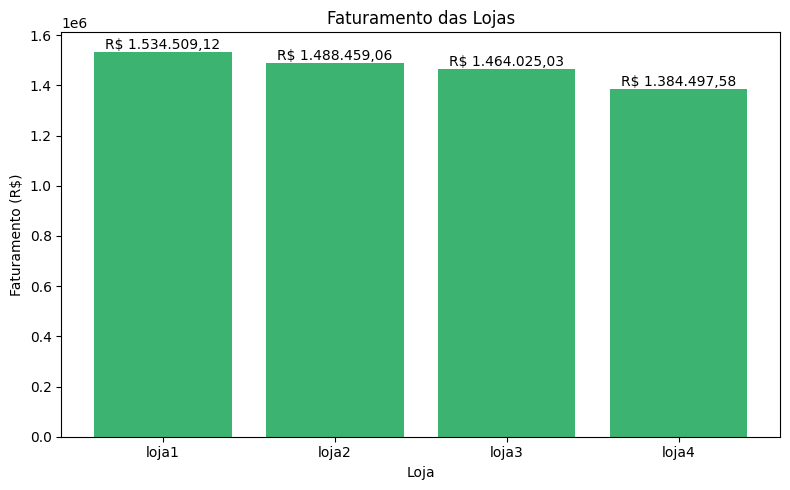

In [9]:
# Calcula os faturamentos usando list comprehension e zip
faturamentos = [pd.read_csv(arquivo)['Preço'].sum() for arquivo in arquivos]

# Cria o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(nomes_lojas, faturamentos, color='mediumseagreen')
plt.title('Faturamento das Lojas')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.tight_layout()

# Adiciona os valores no topo das barras, formatados em reais
[plt.text(
    bar.get_x() + bar.get_width() / 2,
    bar.get_height(),
    f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
    ha='center',
    va='bottom',
    fontsize=10
) for bar, valor in zip(bars, faturamentos)]

plt.show()

# 2. Vendas por Categoria


In [11]:
# Carrega os DataFrames das lojas usando list comprehension
dfs = [pd.read_csv(arquivo) for arquivo in arquivos]

# Calcula o agrupamento e soma por categoria para cada loja usando list comprehension
cats = [df.groupby('Categoria do Produto')['Preço'].sum() for df in dfs]

# Concatena os resultados em um único DataFrame, alinhando pelo índice (categoria)
df_categorias = pd.concat(cats, axis=1)
df_categorias.columns = nomes_lojas
df_categorias = df_categorias.fillna(0)

# Ordena pelo total de vendas (opcional)
df_categorias = df_categorias.loc[df_categorias.sum(axis=1).sort_values(ascending=False).index]

# Formata os valores em reais
df_categorias = df_categorias.applymap(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

display(df_categorias)

C:\Users\chris\AppData\Local\Temp\ipykernel_20828\369072839.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorias = df_categorias.applymap(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))


,loja1,loja2,loja3,loja4
Categoria do Produto,,,,
eletronicos,"R$ 572.659,23","R$ 547.773,71","R$ 547.699,92","R$ 545.966,86"
eletrodomesticos,"R$ 484.913,36","R$ 464.758,13","R$ 438.984,89","R$ 377.680,65"
moveis,"R$ 250.178,11","R$ 235.234,68","R$ 268.095,56","R$ 256.705,65"
instrumentos musicais,"R$ 121.731,69","R$ 139.987,03","R$ 103.174,45","R$ 100.136,50"
esporte e lazer,"R$ 52.387,55","R$ 46.326,09","R$ 47.456,10","R$ 44.465,65"
brinquedos,"R$ 23.993,78","R$ 21.262,21","R$ 25.869,20","R$ 27.015,67"
utilidades domesticas,"R$ 16.931,48","R$ 19.662,86","R$ 20.080,21","R$ 20.098,83"
livros,"R$ 11.713,92","R$ 13.454,35","R$ 12.664,70","R$ 12.427,77"


C:\Users\chris\AppData\Local\Temp\ipykernel_20828\1667126154.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_plot = df_categorias.applymap(lambda x: float(x.replace('R$', '').replace('.', '').replace(',', '.')))


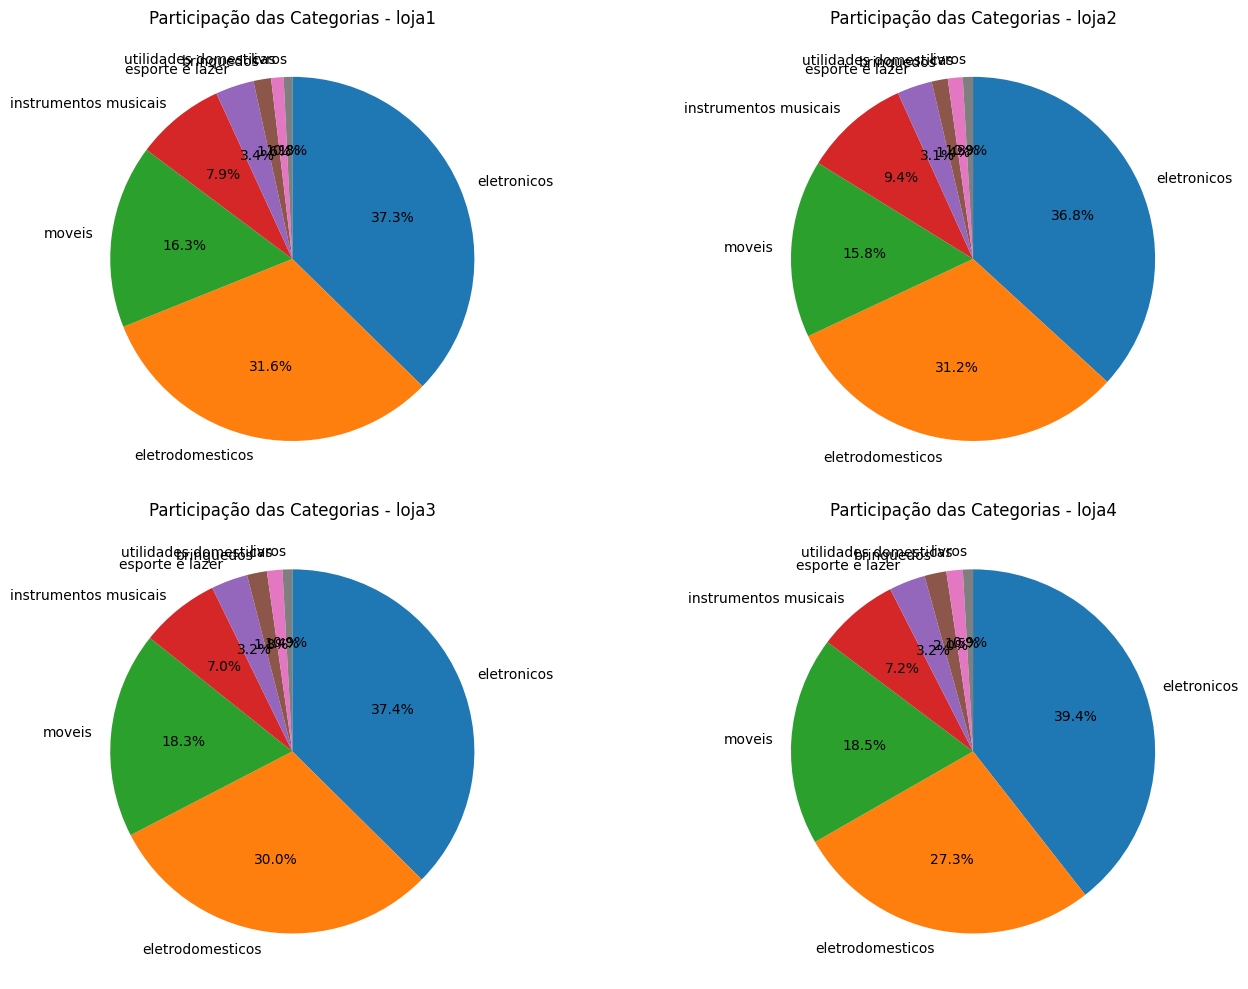

In [12]:
import matplotlib.pyplot as plt

# Remove a formatação de moeda para plotar (caso tenha aplicado antes)
df_plot = df_categorias.applymap(lambda x: float(x.replace('R$', '').replace('.', '').replace(',', '.')))

lojas = df_plot.columns
categorias = df_plot.index

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, loja in zip(axs.flatten(), lojas):
    valores = df_plot[loja]
    ax.pie(
        valores,
        labels=categorias,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    ax.set_title(f'Participação das Categorias - {loja}')

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [15]:
# Calcula a média das avaliações para cada loja usando list comprehension
medias_avaliacao = [
    pd.read_csv(arquivo)['Avaliação da compra'].mean()
    for arquivo in arquivos
]

# Exibe o resultado
for nome, media in zip(nomes_lojas, medias_avaliacao):
    print(f"Média de avaliação {nome}: {media:.2f}")

Média de avaliação loja1: 3.98
Média de avaliação loja2: 4.04
Média de avaliação loja3: 4.05
Média de avaliação loja4: 4.00


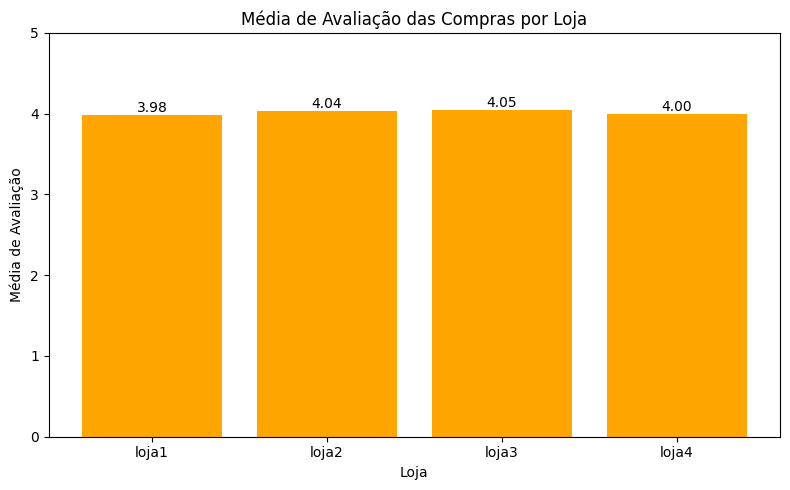

In [16]:
plt.figure(figsize=(8, 5))
bars = plt.bar(nomes_lojas, medias_avaliacao, color='orange')
plt.title('Média de Avaliação das Compras por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.tight_layout()

# Adiciona os valores no topo das barras
for bar, valor in zip(bars, medias_avaliacao):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{valor:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
